# 単回帰

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_x=np.array([235,216,148,35,85,204,49,25,173,191,134,99,117,112,162,272,159,159,59,198])
train_y=np.array([591,539,413,310,308,519,325,332,498,498,392,334,385,387,425,659,400,427,319,522])

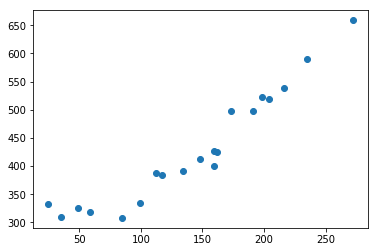

In [3]:
plt.plot(train_x,train_y,'o')
plt.show()

In [4]:
# 仮説関数（予測関数）
def f(x):
    return theta0+theta1*x

In [5]:
# コスト関数（目的関数）
def E(x,y):
    return 0.5*np.sum((y-f(x))**2)

In [6]:
# 標準化（平均０、標準偏差１）
def standardize(x):
    return (x-train_x.mean())/train_x.std()

In [7]:
train_std_x=standardize(train_x)

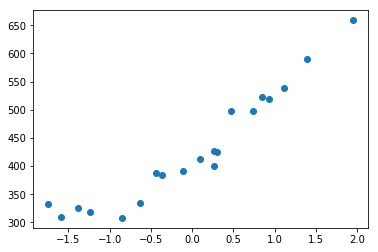

In [8]:
plt.plot(train_std_x,train_y,'o')
plt.show()

In [9]:
# パラメーター初期値
np.random.seed(0)
theta0= np.random.randn()
theta1= np.random.randn()
print("theta0：",theta0)
print("theta1：",theta1)

theta0： 1.764052345967664
theta1： 0.4001572083672233


In [10]:
# 現在の誤差
loss=E(train_std_x,train_y)
print("loss：",loss)

loss： 1922767.2347230148


In [11]:
# 学習率
alpha=0.001
# 反復回数
iteration=500

In [15]:
# パラメーター初期値
np.random.seed(0)
theta0= np.random.randn()
theta1= np.random.randn()
loss_list=[]
for i in range(iteration):
    theta0=theta0-alpha*np.sum(f(train_std_x)-train_y)
    theta1=theta1-alpha*np.sum((f(train_std_x)-train_y)*train_std_x)
    loss=E(train_std_x,train_y)
    loss_list.append(loss)
    
    log="{}回目 ： theta0={:.3f}, theta1={:.3f}, loss={:.3f}"
    print(log.format(i+1,theta0,theta1,loss))


1回目 ： theta0=10.312, theta1=2.262, loss=1847003.574
2回目 ： theta0=18.689, theta1=4.086, loss=1774240.154
3回目 ： theta0=26.898, theta1=5.874, loss=1704358.165
4回目 ： theta0=34.943, theta1=7.626, loss=1637243.504
5回目 ： theta0=42.827, theta1=9.343, loss=1572786.582
6回目 ： theta0=50.553, theta1=11.026, loss=1510882.155
7回目 ： theta0=58.125, theta1=12.675, loss=1451429.144
8回目 ： theta0=65.546, theta1=14.291, loss=1394330.471
9回目 ： theta0=72.818, theta1=15.875, loss=1339492.906
10回目 ： theta0=79.945, theta1=17.427, loss=1286826.909
11回目 ： theta0=86.929, theta1=18.948, loss=1236246.485
12回目 ： theta0=93.773, theta1=20.438, loss=1187669.045
13回目 ： theta0=100.481, theta1=21.899, loss=1141015.273
14回目 ： theta0=107.054, theta1=23.331, loss=1096208.990
15回目 ： theta0=113.496, theta1=24.734, loss=1053177.035
16回目 ： theta0=119.809, theta1=26.109, loss=1011849.146
17回目 ： theta0=125.996, theta1=27.456, loss=972157.842
18回目 ： theta0=132.059, theta1=28.777, loss=934038.313
19回目 ： theta0=138.001, theta1=30.071, 

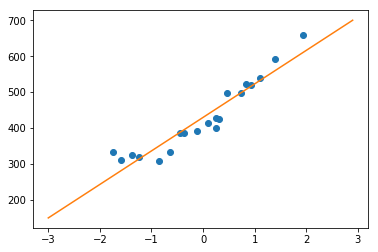

In [16]:
x=np.arange(-3,3,0.1)
plt.plot(train_std_x,train_y,'o')
plt.plot(x,f(x))
plt.show()

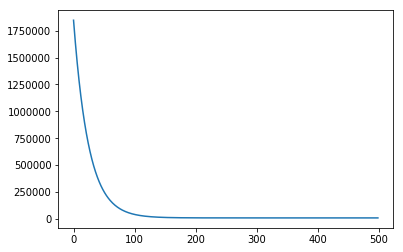

In [17]:
iter=np.arange(len(loss_list))
plt.plot(iter, loss_list)
plt.show()

# 多項式回帰

In [44]:
# パラメーター初期化
np.random.seed(0)
theta=np.random.randn(3)
print("theta：",theta)

theta： [1.76405235 0.40015721 0.97873798]


In [17]:
# 学習データの行列
def to_matrix(x):
    return np.vstack((np.ones(x.shape[0]), x, x**2)).T

In [31]:
X=to_matrix(train_std_x)
X

array([[ 1.        ,  1.39433428,  1.94416809],
       [ 1.        ,  1.11069026,  1.23363286],
       [ 1.        ,  0.09554325,  0.00912851],
       [ 1.        , -1.59139223,  2.53252924],
       [ 1.        , -0.8449606 ,  0.71395842],
       [ 1.        ,  0.93154667,  0.8677792 ],
       [ 1.        , -1.38239138,  1.91100592],
       [ 1.        , -1.74067856,  3.02996185],
       [ 1.        ,  0.46875906,  0.21973506],
       [ 1.        ,  0.73747445,  0.54386856],
       [ 1.        , -0.11345761,  0.01287263],
       [ 1.        , -0.63595975,  0.4044448 ],
       [ 1.        , -0.36724436,  0.13486842],
       [ 1.        , -0.44188752,  0.19526458],
       [ 1.        ,  0.3045441 ,  0.09274711],
       [ 1.        ,  1.94669369,  3.78961632],
       [ 1.        ,  0.25975821,  0.06747433],
       [ 1.        ,  0.25975821,  0.06747433],
       [ 1.        , -1.23310505,  1.52054807],
       [ 1.        ,  0.84197488,  0.70892169]])

In [19]:
# 仮説関数
def f(x):
    return np.dot(x, theta)

In [20]:
f(X)

array([4.22483642, 3.4159064 , 1.81121909, 3.60592784, 2.1247135 ,
       2.98614593, 3.08125255, 4.03304602, 2.16669271, 2.59146288,
       1.7312504 , 1.90541396, 1.74909771, 1.77834073, 1.97669299,
       6.25207729, 1.93403615, 1.93403615, 2.75883462, 2.79482325])

In [32]:
# 平均２乗誤差
def mse(x,y):
    return (1/x.shape[0])*np.sum((y-f(x))**2)

In [21]:
# 学習率
alpha=0.01
# 反復回数
iteration=500

In [35]:
# パラメーター初期化
np.random.seed(0)
theta=np.random.randn(3)

loss_list=[]

for i in range(iteration):
    theta=theta-alpha*np.dot(f(X)-train_y,X)
    loss=mse(X,train_y)
    loss_list.append(mse(X,train_y))
    
    log="{}回目 ： theta={}, loss={:.3f}"
    print(log.format(i+1,theta,loss))


1回目 ： theta=[87.04549428 19.02945623 90.16177037], loss=75593.052
2回目 ： theta=[137.43404135  35.17002629 123.69123745], loss=44908.056
3回目 ： theta=[171.03898559  48.54759702 132.75861217], loss=33083.313
4回目 ： theta=[196.10946604  59.37543458 131.34005118], loss=26286.637
5回目 ： theta=[216.4495626   68.01802661 125.67564147], loss=21416.314
6回目 ： theta=[233.85452178  74.85352457 118.53099861], loss=17628.215
7回目 ： theta=[249.2074177   80.22281375 111.1129976 ], loss=14594.703
8回目 ： theta=[262.97333464  84.41534393 103.93081013], loss=12133.974
9回目 ： theta=[275.42250569  87.66973807  97.18276781], loss=10122.685
10回目 ： theta=[286.73145099  90.17964577  90.93005568], loss=8469.916
11回目 ： theta=[297.02914965  92.10083543  85.17458364], loss=7106.219
12回目 ： theta=[306.41840299  93.5579483   79.89379443], loss=5977.471
13回目 ： theta=[314.98596351  94.65038445  75.0561274 ], loss=5040.893
14回目 ： theta=[322.80754533  95.45722613  70.62780074], loss=4262.281
15回目 ： theta=[329.95047611  96.041270

375回目 ： theta=[406.04429828  95.08135843  23.10570172], loss=327.786
376回目 ： theta=[406.04429828  95.08135843  23.10570172], loss=327.786
377回目 ： theta=[406.04429828  95.08135843  23.10570172], loss=327.786
378回目 ： theta=[406.04429828  95.08135843  23.10570172], loss=327.786
379回目 ： theta=[406.04429828  95.08135843  23.10570172], loss=327.786
380回目 ： theta=[406.04429828  95.08135843  23.10570172], loss=327.786
381回目 ： theta=[406.04429828  95.08135843  23.10570172], loss=327.786
382回目 ： theta=[406.04429828  95.08135843  23.10570172], loss=327.786
383回目 ： theta=[406.04429828  95.08135843  23.10570172], loss=327.786
384回目 ： theta=[406.04429828  95.08135843  23.10570172], loss=327.786
385回目 ： theta=[406.04429828  95.08135843  23.10570172], loss=327.786
386回目 ： theta=[406.04429828  95.08135843  23.10570172], loss=327.786
387回目 ： theta=[406.04429828  95.08135843  23.10570172], loss=327.786
388回目 ： theta=[406.04429828  95.08135843  23.10570172], loss=327.786
389回目 ： theta=[406.04429828  95.08

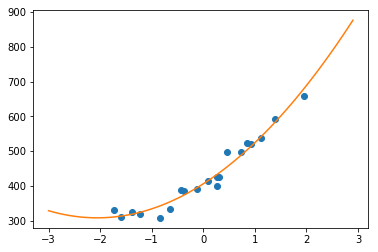

In [23]:
x=np.arange(-3,3,0.1)
plt.plot(train_std_x,train_y,'o')
plt.plot(x,f(to_matrix(x)))
plt.show()

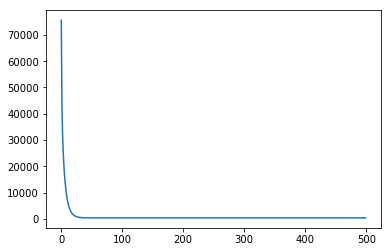

In [43]:
iter=np.arange(len(loss_list))
plt.plot(iter, loss_list)
plt.show()